# Import libraries

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Download the dataset

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv


--2022-07-07 23:07:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2022-07-07 23:07:47 (1.87 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



# Take a look at the dataset

In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Here, I choose the selected columns.

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


As you saw in Simple Linear Regression, It seems that Engine size has something to do with CO2 emission.

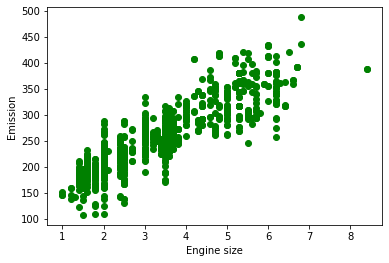

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# What do we expect?

Polynomial Regression creates a polynomial equation in 2D, 3D, 4D, or higher dimensions. The same characteristic of these equations are being not being linear and consisting of $x^2$, $x^3$, or such kind of factors. This is an example for 3D linear equation.

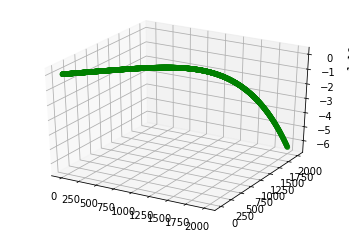

In [10]:
x1 = np.arange(2000)
x2 = np.arange(2000)

ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, 32 + -2 * x1**5 + 40 * x2, color='green')
plt.show()

# Create the train and test data

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Preprocessing the data

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

# Train data

Here I consider only one factor.

In [22]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         47.20216922 -1.07210264]]
Intercept:  [112.64533864]


## Plot the equation

Text(0, 0.5, 'Emission')

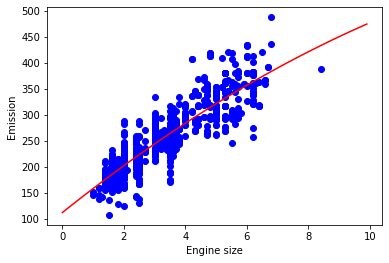

In [23]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

# Test

In [25]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ))

Mean absolute error: 24.31
Residual sum of squares (MSE): 1000.21
R2-score: 0.75


# Preprocessing data with multiple factors

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.000000e+00, 2.400000e+00, 4.000000e+00, ..., 1.536000e+02,
        3.686400e+02, 8.847360e+02],
       [1.000000e+00, 1.500000e+00, 4.000000e+00, ..., 9.440000e+01,
        1.392400e+02, 2.053790e+02],
       [1.000000e+00, 3.500000e+00, 6.000000e+00, ..., 3.996000e+02,
        7.392600e+02, 1.367631e+03],
       ...,
       [1.000000e+00, 3.200000e+00, 6.000000e+00, ..., 4.140000e+02,
        7.935000e+02, 1.520875e+03],
       [1.000000e+00, 3.000000e+00, 6.000000e+00, ..., 4.248000e+02,
        8.354400e+02, 1.643032e+03],
       [1.000000e+00, 3.200000e+00, 6.000000e+00, ..., 4.608000e+02,
        9.830400e+02, 2.097152e+03]])

# Train data

Here I consider multiple factors.

In [27]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00 -8.85145394e+00 -2.08533056e+01  8.22808825e+01
  -3.66437653e+01  1.97010468e+01  1.57611146e+01  2.46308181e+00
  -7.66065513e+00 -5.24412131e+00 -9.16515207e+00  1.09028178e+01
   6.73436489e+00 -2.33684559e+00 -7.43478280e+00 -7.13487978e-01
  -1.30371683e+00  2.98180181e+00  7.89873207e-02  1.37457457e-01]]
Intercept:  [-153.56809286]


# Test

In [28]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ))

Mean absolute error: 11.49
Residual sum of squares (MSE): 298.49
R2-score: 0.93
